# Données temporelles
modules: 
- python: datetime, calendar, time
- tiers: dateutil, numpy/pandas: datetime64

In [195]:
from datetime import datetime, date, time, timedelta, tzinfo
from dateutil.relativedelta import relativedelta
import locale
import pytz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Module datetime
https://en.wikipedia.org/wiki/ISO_8601
Types:
- datetime: year, month, day, hour,minute, second, decimal part (us) avec ou sans tzinfo
- date: year, month, day
- time: hour,minute, second, decimal part (us)
- timedelta: durée exacte (day, hour, minute, second, decimal part)
- tzinfo: time zone

### Construction donnée temporelle

#### Today/now

In [9]:
maintenant = datetime.now()
aujourdhui = date.today()
print(maintenant) # local datetime
print(aujourdhui) # local date
print(maintenant.time()) # local time

2023-12-13 09:33:50.567146
2023-12-13
09:33:50.567146


#### Constructeur

In [12]:
dt1 = datetime(2023, 12, 25, 8)
print(dt1)
dt1

2023-12-25 08:00:00


datetime.datetime(2023, 12, 25, 8, 0)

In [14]:
# d1 = date(2026, 2, 29) # ValueError: day is out of range for month
d1 = date(2024, 2, 29)
d1

datetime.date(2024, 2, 29)

In [18]:
# Exo: fabriquer tous les 29 février entre 2000 et 2200
for year in range(2000, 2201):
    try:
        d = date(year, 2, 29)
        print(d)
    except:
        pass

2000-02-29
2004-02-29
2008-02-29
2012-02-29
2016-02-29
2020-02-29
2024-02-29
2028-02-29
2032-02-29
2036-02-29
2040-02-29
2044-02-29
2048-02-29
2052-02-29
2056-02-29
2060-02-29
2064-02-29
2068-02-29
2072-02-29
2076-02-29
2080-02-29
2084-02-29
2088-02-29
2092-02-29
2096-02-29
2104-02-29
2108-02-29
2112-02-29
2116-02-29
2120-02-29
2124-02-29
2128-02-29
2132-02-29
2136-02-29
2140-02-29
2144-02-29
2148-02-29
2152-02-29
2156-02-29
2160-02-29
2164-02-29
2168-02-29
2172-02-29
2176-02-29
2180-02-29
2184-02-29
2188-02-29
2192-02-29
2196-02-29


#### Parsing texte

In [19]:
dtIsoStr1 = '2023-12-25T08:00:00.10'
dtIsoStr2 = '2023-12-25 08:00'
dt1 = datetime.fromisoformat(dtIsoStr1)
dt2 = datetime.fromisoformat(dtIsoStr2)
dt1, dt2

(datetime.datetime(2023, 12, 25, 8, 0, 0, 100000),
 datetime.datetime(2023, 12, 25, 8, 0))

In [21]:
dIsoStr = '2023-12-25'
d = date.fromisoformat(dIsoStr)
d

datetime.date(2023, 12, 25)

In [27]:
dFrStr = '25/12/2023'
dtFrStr = '25/12/2023 08:00'
d = datetime.strptime(dFrStr, '%d/%m/%Y').date()
dt = datetime.strptime(dtFrStr, '%d/%m/%Y %H:%M')
d, dt

(datetime.date(2023, 12, 25), datetime.datetime(2023, 12, 25, 8, 0))

#### Formater une donnée temporelle

In [34]:
# str method => ISO format
print(d, dt, sep=', ') 
print(f"date = {d} ; datetime = {dt}")

# repr method => object format
print(repr(d), repr(dt), sep=', ') 
print(f"date = {d!r} ; datetime = {dt!r}")
dt

2023-12-25, 2023-12-25 08:00:00
date = 2023-12-25 ; datetime = 2023-12-25 08:00:00
datetime.date(2023, 12, 25), datetime.datetime(2023, 12, 25, 8, 0)
date = datetime.date(2023, 12, 25) ; datetime = datetime.datetime(2023, 12, 25, 8, 0)


datetime.datetime(2023, 12, 25, 8, 0)

In [53]:
# fr format
FORMAT_FR_DATE = '%d/%m/%Y'
FORMAT_FR_DATETIME = '%d/%m/%Y %H:%M'
print(d.strftime(FORMAT_FR_DATE), dt.strftime(FORMAT_FR_DATETIME), sep=', ') 
print(f"date = {d:{FORMAT_FR_DATE}} ; datetime = {dt:{FORMAT_FR_DATETIME}}")

25/12/2023, 25/12/2023 08:00
date = 25/12/2023 ; datetime = 25/12/2023 08:00


In [37]:
# format with letters for day and month: FR, EN, ES
FORMAT_LOCALE_LETTERS_DATE = '%A %d %B %Y'
print(d.strftime(FORMAT_LOCALE_LETTERS_DATE))

Monday 25 December 2023


In [42]:
print(locale.getlocale())
print(locale.getlocale(locale.LC_TIME))

('fr_FR', 'cp1252')
(None, None)


In [50]:
for locale_name in ('fr_FR', 'en_UK', 'es_ES', 'tr_TR'):
    locale.setlocale(locale.LC_ALL, locale_name)
    print(locale.getlocale())
    print(locale.getlocale(locale.LC_TIME))
    print(d.strftime(FORMAT_LOCALE_LETTERS_DATE))
    print()

('fr_FR', 'ISO8859-1')
('fr_FR', 'ISO8859-1')
lundi 25 décembre 2023

('en_GB', 'ISO8859-1')
('en_GB', 'ISO8859-1')
Monday 25 December 2023

('es_ES', 'ISO8859-1')
('es_ES', 'ISO8859-1')
lunes 25 diciembre 2023

('tr_TR', 'ISO8859-9')
('tr_TR', 'ISO8859-9')
Pazartesi 25 Aralık 2023



In [52]:
# lettres cyrilliques vs lettres latines
'Моса' == 'Moca'

False

In [47]:
# locale.locale_alias

### Time zones
- datetime.tzinfo class
- pytz (tiers): name => tzinfo

In [56]:
tz_France_Metropole = pytz.timezone('Europe/Paris')
tz_France_Metropole

<DstTzInfo 'Europe/Paris' LMT+0:09:00 STD>

In [58]:
dtParis = datetime.now(tz=tz_France_Metropole)
dtParis

datetime.datetime(2023, 12, 13, 11, 19, 36, 458000, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>)

In [80]:
def optionalTimezone(tzName: str) -> tzinfo|None:
    """ convert a timezone name in tzinfo with pytz
    
        returns tzinfo if name is found else None
    """
    try:
        return pytz.timezone(tzName)
    except pytz.UnknownTimeZoneError as e:
        return None
    
timezones = {
    'Paris': tz_France_Metropole,
    'Sao Paulo': optionalTimezone('America/Sao_Paulo'),
    'Honolulu': optionalTimezone('Pacific/Honolulu'),
    'Istanbul':optionalTimezone('Europe/Istanbul'),
    'Sydney': optionalTimezone('Australia/Sydney'),
    'Los Angeles': optionalTimezone('America/Los_Angeles'),
    'New York': optionalTimezone('America/New_York'),
    'Tokyo': None,
    'Andaman': optionalTimezone('India/Andaman'), # wrong TZ
}
# afficher le now de ces différentes villes
for ville, tz in timezones.items():
    if tz is not None:
        dt = datetime.now(tz=tz)
        print(f"{ville}: {dt:%d/%m/%Y %H:%M}")
    else:
        print(f"{ville}: timezone inconnue ou non définie")


Paris: 13/12/2023 11:48
Sao Paulo: 13/12/2023 07:48
Honolulu: 13/12/2023 00:48
Istanbul: 13/12/2023 13:48
Sydney: 13/12/2023 21:48
Los Angeles: 13/12/2023 02:48
New York: 13/12/2023 05:48
Tokyo: timezone inconnue ou non définie
Andaman: timezone inconnue ou non définie


### Calcul sur données temporelles

In [85]:
d0 = date.today()
d1 = d0 - timedelta(days=4)
print(d0, d1, sep=', ')

2023-12-13, 2023-12-09


In [86]:
dt0 = datetime.now()
dt1 = dt0 + timedelta(days=4, hours=5)
print(dt0, dt1, sep=', ')

2023-12-13 11:54:03.458705, 2023-12-17 16:54:03.458705


In [87]:
d1 - d0

datetime.timedelta(days=-4)

In [88]:
dt1 - dt0

datetime.timedelta(days=4, seconds=18000)

In [89]:
timedelta(hours=36)

datetime.timedelta(days=1, seconds=43200)

In [95]:
d2 = d0 - relativedelta(years=10)
print(d2)

2013-12-13


In [96]:
d3 = date(2024,2,29)
d4 = d3 + relativedelta(years=10)
print(d3, d4, sep=',')

2024-02-29,2034-02-28


In [101]:
d5 = date(2023,12,31)
d6 = d5 + relativedelta(months=2)
print(d5, d6, sep=', ')

2023-12-31, 2024-02-29


## Pandas

In [129]:
readColumns = [
    'data', 'id', 'humidite', 'pression', 'pluie', 'temperature', 'heure_de_paris', 'heure_utc'
]

In [113]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    prefix: 'str | lib.NoDefault' = <no_default>,
    mangle_dupe_cols: 'bool' = True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates=None,
    infer

In [144]:
dfMeteo = pd.read_csv(
    '39-station-meteo-tournefeuille-ecole.csv', 
    sep=';',
    usecols=readColumns,
    parse_dates=['heure_de_paris', 'heure_utc']
).sort_values('heure_utc')
dfMeteo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61940 entries, 2643 to 61566
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   data            61940 non-null  object             
 1   id              61940 non-null  int64              
 2   humidite        61940 non-null  int64              
 3   pression        61940 non-null  int64              
 4   pluie           61940 non-null  float64            
 5   temperature     61940 non-null  float64            
 6   heure_de_paris  61940 non-null  object             
 7   heure_utc       61940 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(2)
memory usage: 4.3+ MB


In [145]:
dfMeteo.head()

,data,id,humidite,pression,pluie,temperature,heure_de_paris,heure_utc
2643,4eb32710e59006a1ad545800,39,50,100600,0.0,17.9,2021-05-19 15:45:00+02:00,2021-05-19 13:45:00+00:00
30646,4eb32730e59007614d568800,39,50,100600,0.0,17.9,2021-05-19 16:00:00+02:00,2021-05-19 14:00:00+00:00
31621,4eb32750c9c00741ed58a000,39,56,100600,0.0,17.2,2021-05-19 16:15:00+02:00,2021-05-19 14:15:00+00:00
2644,4eb32770224007a1ad588800,39,72,100600,0.0,14.8,2021-05-19 16:30:00+02:00,2021-05-19 14:30:00+00:00
31622,4eb3279055f807714d586800,39,63,100600,0.0,15.5,2021-05-19 16:45:00+02:00,2021-05-19 14:45:00+00:00


In [146]:
dfMeteo.columns

Index(['data', 'id', 'humidite', 'pression', 'pluie', 'temperature',
       'heure_de_paris', 'heure_utc'],
      dtype='object')

In [147]:
dfMeteo.columns = ['data', 'id', 'humidite', 'pression', 'pluie', 'temperature',
       'heure_de_paris', 'heure_utc']
dfMeteo.head()

,data,id,humidite,pression,pluie,temperature,heure_de_paris,heure_utc
2643,4eb32710e59006a1ad545800,39,50,100600,0.0,17.9,2021-05-19 15:45:00+02:00,2021-05-19 13:45:00+00:00
30646,4eb32730e59007614d568800,39,50,100600,0.0,17.9,2021-05-19 16:00:00+02:00,2021-05-19 14:00:00+00:00
31621,4eb32750c9c00741ed58a000,39,56,100600,0.0,17.2,2021-05-19 16:15:00+02:00,2021-05-19 14:15:00+00:00
2644,4eb32770224007a1ad588800,39,72,100600,0.0,14.8,2021-05-19 16:30:00+02:00,2021-05-19 14:30:00+00:00
31622,4eb3279055f807714d586800,39,63,100600,0.0,15.5,2021-05-19 16:45:00+02:00,2021-05-19 14:45:00+00:00


In [148]:
# 1 valeur sur la colonne heure_utc
dfMeteo.iloc[0,-1]

Timestamp('2021-05-19 13:45:00+0000', tz='UTC')

In [149]:
# 1 valeur sur la colonne heure_de_paris (été)
dfMeteo.iloc[0,-2]

datetime.datetime(2021, 5, 19, 15, 45, tzinfo=tzoffset(None, 7200))

In [152]:
# 1 valeur sur la colonne heure_de_paris (hiver)
dfMeteo.iloc[20000,-2]

datetime.datetime(2022, 2, 28, 1, 15, tzinfo=tzoffset(None, 3600))

In [158]:
dfMeteo.temperature.min(), \
dfMeteo.temperature.max(), \
np.ptp(dfMeteo.temperature)

(-50.0, 42.1, 92.1)

In [159]:
temperatureThreshold = -48.0

In [160]:
dfMeteo[dfMeteo.temperature <= temperatureThreshold]

,data,id,humidite,pression,pluie,temperature,heure_de_paris,heure_utc
24676,4e3f44800000000000000000,39,0,90000,0.0,-50.0,2023-01-31 09:45:00+01:00,2023-01-31 08:45:00+00:00
22477,4e3f44a00000000000000000,39,0,90000,0.0,-50.0,2023-01-31 10:00:00+01:00,2023-01-31 09:00:00+00:00


In [166]:
# NB: mask (substitute values where cond is True)
# NB: where (substitute values where cond is False)
newTemperature = dfMeteo.temperature.mask(dfMeteo.temperature <= temperatureThreshold)
newTemperature.min(), newTemperature.max(), np.ptp(newTemperature)

(-6.9, 42.1, nan)

In [167]:
dfMeteo.temperature = newTemperature

<Axes: xlabel='heure_utc'>

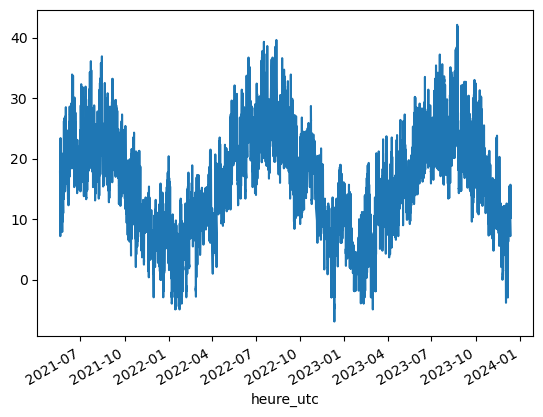

In [168]:
temperatures = dfMeteo.set_index('heure_utc')['temperature']
temperatures.plot()

In [170]:
dfTemperaturePression = dfMeteo.set_index('heure_utc')[['temperature', 'pression']]
dfTemperaturePression.head()

,temperature,pression
heure_utc,,
2021-05-19 13:45:00+00:00,17.9,100600
2021-05-19 14:00:00+00:00,17.9,100600
2021-05-19 14:15:00+00:00,17.2,100600
2021-05-19 14:30:00+00:00,14.8,100600
2021-05-19 14:45:00+00:00,15.5,100600


In [172]:
dfTemperaturePression202308 =  dfTemperaturePression.loc['2023-08']
dfTemperaturePression202308

,temperature,pression
heure_utc,,
2023-08-01 06:15:00+00:00,18.4,99800
2023-08-01 06:30:00+00:00,18.8,99800
2023-08-01 06:45:00+00:00,19.3,99700
2023-08-01 07:00:00+00:00,19.8,99700
2023-08-01 07:15:00+00:00,20.2,99700
...,...,...
2023-08-31 22:45:00+00:00,19.3,100000
2023-08-31 23:00:00+00:00,18.6,100000
2023-08-31 23:15:00+00:00,18.2,100000


<Axes: xlabel='heure_utc'>

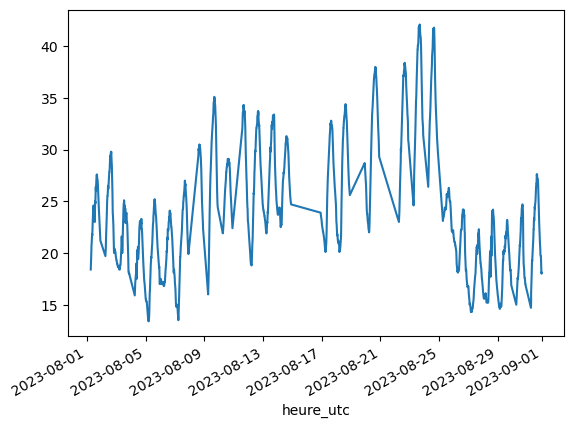

In [174]:
dfTemperaturePression202308.temperature.plot()

<Axes: xlabel='heure_utc'>

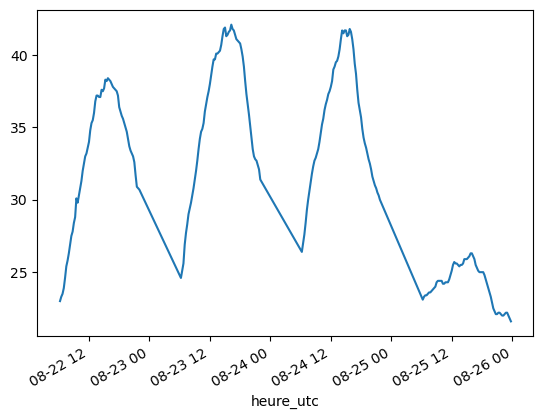

In [175]:
extract = dfTemperaturePression.loc['2023-08-21':'2023-08-25', 'temperature']
extract.plot()

In [177]:
dfMeteo.heure_utc.dt.strftime('%d/%m/%Y') 

2643     19/05/2021
30646    19/05/2021
31621    19/05/2021
2644     19/05/2021
31622    19/05/2021
            ...    
61939    13/12/2023
60910    13/12/2023
60911    13/12/2023
60912    13/12/2023
61566    13/12/2023
Name: heure_utc, Length: 61940, dtype: object

In [178]:
dfMeteo.heure_utc.dt.year # mont, day, hour, ...

2643     2021
30646    2021
31621    2021
2644     2021
31622    2021
         ... 
61939    2023
60910    2023
60911    2023
60912    2023
61566    2023
Name: heure_utc, Length: 61940, dtype: int64

In [179]:
dfMeteo.heure_utc + timedelta(days=10)

2643    2021-05-29 13:45:00+00:00
30646   2021-05-29 14:00:00+00:00
31621   2021-05-29 14:15:00+00:00
2644    2021-05-29 14:30:00+00:00
31622   2021-05-29 14:45:00+00:00
                   ...           
61939   2023-12-23 11:45:00+00:00
60910   2023-12-23 12:00:00+00:00
60911   2023-12-23 12:15:00+00:00
60912   2023-12-23 12:30:00+00:00
61566   2023-12-23 12:45:00+00:00
Name: heure_utc, Length: 61940, dtype: datetime64[ns, UTC]

In [188]:
# max sur tputes les colonnes
dfMeteo.groupby(pd.Grouper(key='heure_utc', freq='1D')).max()

,data,id,humidite,pression,pluie,temperature,heure_de_paris
heure_utc,,,,,,,
2021-05-19 00:00:00+00:00,4eb32c0f026000000d960800,39.0,76.0,100800.0,0.0,17.9,2021-05-20 01:45:00+02:00
2021-05-20 00:00:00+00:00,4eb42b301df007000cb40c00,39.0,88.0,100800.0,0.0,23.4,2021-05-21 00:00:00+02:00
2021-05-21 00:00:00+00:00,4eb52c0f26d805700c4e1400,39.0,91.0,100000.0,0.4,21.1,2021-05-22 01:45:00+02:00
2021-05-22 00:00:00+00:00,4eb62b2f428806204cd21400,39.0,94.0,100200.0,0.0,17.4,2021-05-23 00:00:00+02:00
2021-05-23 00:00:00+00:00,4eb72c0f666800000c400000,39.0,87.0,100300.0,0.0,18.5,2021-05-24 01:45:00+02:00
...,...,...,...,...,...,...,...
2023-12-09 00:00:00+00:00,4f894bafcea805b06d0e2000,39.0,95.0,100400.0,0.2,15.1,2023-12-10 00:00:00+01:00
2023-12-10 00:00:00+00:00,4f8a4baf5ef804300c8c0c00,39.0,95.0,100200.0,0.0,15.5,2023-12-11 00:00:00+01:00
2023-12-11 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
dfMeteo.groupby(pd.Grouper(key='heure_utc', freq='1D'))[['humidite','pression','temperature','pluie']].max()

,humidite,pression,temperature,pluie
heure_utc,,,,
2021-05-19 00:00:00+00:00,76.0,100800.0,17.9,0.0
2021-05-20 00:00:00+00:00,88.0,100800.0,23.4,0.0
2021-05-21 00:00:00+00:00,91.0,100000.0,21.1,0.4
2021-05-22 00:00:00+00:00,94.0,100200.0,17.4,0.0
2021-05-23 00:00:00+00:00,87.0,100300.0,18.5,0.0
...,...,...,...,...
2023-12-09 00:00:00+00:00,95.0,100400.0,15.1,0.2
2023-12-10 00:00:00+00:00,95.0,100200.0,15.5,0.0
2023-12-11 00:00:00+00:00,NaN,NaN,NaN,NaN


In [190]:
dfMeteo.groupby(pd.Grouper(key='heure_utc', freq='1D')) \
        [['humidite','pression','temperature','pluie']] \
        .agg(['min','max','mean'])

humidite                   pression            \
                               min   max       mean       min       max   
heure_utc                                                                 
2021-05-19 00:00:00+00:00     50.0  76.0  61.121951  100600.0  100800.0   
2021-05-20 00:00:00+00:00     29.0  88.0  57.000000  100100.0  100800.0   
2021-05-21 00:00:00+00:00     49.0  91.0  81.025641   99500.0  100000.0   
2021-05-22 00:00:00+00:00     53.0  94.0  73.910112   99700.0  100200.0   
2021-05-23 00:00:00+00:00     40.0  87.0  57.056338   99800.0  100300.0   
...                            ...   ...        ...       ...       ...   
2023-12-09 00:00:00+00:00     85.0  95.0  90.218750   99700.0  100400.0   
2023-12-10 00:00:00+00:00     82.0  95.0  89.625000  100000.0  100200.0   
2023-12-11 00:00:00+00:00      NaN   NaN        NaN       NaN       NaN   
2023-12-12 00:00:00+00:00     80.0  97.0  92.731343   99200.0   99600.0   
2023-12-13 00:00:00+00:00     80.0  96.0  88.057692   99100.0   99200.0   

                                         temperature                  pluie  \
                                    mean         min   max       mean   min   
heure_utc                                                                     
2021-05-19 00:00:00+00:00  100680.487805        10.0  17.9  14.700000   0.0   
2021-05-20 00:00:00+00:00  100432.584270         7.2  23.4  15.802247   0.0   
2021-05-21 00:00:00+00:00   99738.461538        10.7  21.1  13.817949   0.0   
2021-05-22 00:00:00+00:00   99825.842697         9.8  17.4  13.196629   0.0   
2021-05-23 00:00:00+00:00  100057.746479         9.9  18.5  15.481690   0.0   
...                                  ...         ...   ...        ...   ...   
2023-12-09 00:00:00+00:00  100087.500000        12.8  15.1  13.950000   0.0   
2023-12-10 00:00:00+00:00  100121.875000        11.7  15.5  13.740625   0.0   
2023-12-11 00:00:00+00:00            NaN         NaN   NaN        NaN   NaN   
2023-12-12 00:00:00+00:00   99471.641791         7.2  15.7  11.398507   0.0   
2023-12-13 00:00:00+00:00   99142.307692        10.2  10.9  10.567308   0.0   

                                          
                           max      mean  
heure_utc                                 
2021-05-19 00:00:00+00:00  0.0  0.000000  
2021-05-20 00:00:00+00:00  0.0  0.000000  
2021-05-21 00:00:00+00:00  0.4  0.041026  
2021-05-22 00:00:00+00:00  0.0  0.000000  
2021-05-23 00:00:00+00:00  0.0  0.000000  
...                        ...       ...  
2023-12-09 00:00:00+00:00  0.2  0.050000  
2023-12-10 00:00:00+00:00  0.0  0.000000  
2023-12-11 00:00:00+00:00  NaN       NaN  
2023-12-12 00:00:00+00:00  0.4  0.023881  
2023-12-13 00:00:00+00:00  0.4  0.115385  

[939 rows x 12 columns]

In [192]:
stats = dfMeteo.groupby(pd.Grouper(key='heure_utc', freq='1D')) \
        .agg({
            'data': 'count',
            'temperature': ['min','max','mean', 'std'],
            'pression': 'mean',
            'id': [ 'unique', 'nunique' ],
        })
stats

data temperature                             \
                          count         min   max       mean       std   
heure_utc                                                                
2021-05-19 00:00:00+00:00    41        10.0  17.9  14.700000  2.578081   
2021-05-20 00:00:00+00:00    89         7.2  23.4  15.802247  5.684328   
2021-05-21 00:00:00+00:00    39        10.7  21.1  13.817949  3.766464   
2021-05-22 00:00:00+00:00    89         9.8  17.4  13.196629  2.393716   
2021-05-23 00:00:00+00:00    71         9.9  18.5  15.481690  2.251051   
...                         ...         ...   ...        ...       ...   
2023-12-09 00:00:00+00:00    32        12.8  15.1  13.950000  0.832408   
2023-12-10 00:00:00+00:00    32        11.7  15.5  13.740625  1.221279   
2023-12-11 00:00:00+00:00     0         NaN   NaN        NaN       NaN   
2023-12-12 00:00:00+00:00    67         7.2  15.7  11.398507  2.036001   
2023-12-13 00:00:00+00:00    52        10.2  10.9  10.567308  0.186528   

                                pression     id          
                                    mean unique nunique  
heure_utc                                                
2021-05-19 00:00:00+00:00  100680.487805   [39]       1  
2021-05-20 00:00:00+00:00  100432.584270   [39]       1  
2021-05-21 00:00:00+00:00   99738.461538   [39]       1  
2021-05-22 00:00:00+00:00   99825.842697   [39]       1  
2021-05-23 00:00:00+00:00  100057.746479   [39]       1  
...                                  ...    ...     ...  
2023-12-09 00:00:00+00:00  100087.500000   [39]       1  
2023-12-10 00:00:00+00:00  100121.875000   [39]       1  
2023-12-11 00:00:00+00:00            NaN     []       0  
2023-12-12 00:00:00+00:00   99471.641791   [39]       1  
2023-12-13 00:00:00+00:00   99142.307692   [39]       1  

[939 rows x 8 columns]

In [194]:
stats2 = dfTemperaturePression \
            .loc['2023-08'] \
            .groupby(pd.Grouper(freq='1D')) \
            .agg({
                'temperature': ['min','max', 'mean', 'std'],
                'pression': ['mean', np.ptp ]
            })
stats2

temperature                             \
                                  min   max       mean       std   
heure_utc                                                          
2023-08-01 00:00:00+00:00        18.4  27.6  23.979688  2.340138   
2023-08-02 00:00:00+00:00        19.5  29.8  24.543662  3.548027   
2023-08-03 00:00:00+00:00        17.8  25.1  20.814607  2.355822   
2023-08-04 00:00:00+00:00        15.9  23.3  19.759155  2.286206   
2023-08-05 00:00:00+00:00        13.4  25.2  19.112903  3.726819   
2023-08-06 00:00:00+00:00        16.8  24.1  19.702083  2.491669   
2023-08-07 00:00:00+00:00        13.5  27.0  20.462921  4.399158   
2023-08-08 00:00:00+00:00        22.3  30.5  27.818750  2.782252   
2023-08-09 00:00:00+00:00        16.0  35.1  28.846875  5.337587   
2023-08-10 00:00:00+00:00        21.9  29.1  26.212500  2.375704   
2023-08-11 00:00:00+00:00        22.9  34.3  30.023077  4.014085   
2023-08-12 00:00:00+00:00        18.8  33.7  26.501042  4.916235   
2023-08-13 00:00:00+00:00        21.9  33.4  27.014583  3.814763   
2023-08-14 00:00:00+00:00        22.5  31.3  26.756180  2.839332   
2023-08-15 00:00:00+00:00         NaN   NaN        NaN       NaN   
2023-08-16 00:00:00+00:00        23.2  23.9  23.514286  0.241030   
2023-08-17 00:00:00+00:00        20.1  32.8  26.310417  4.267144   
2023-08-18 00:00:00+00:00        20.1  34.4  27.088764  5.089393   
2023-08-19 00:00:00+00:00        27.2  28.7  27.971429  0.576525   
2023-08-20 00:00:00+00:00        22.0  38.0  30.614607  5.548537   
2023-08-21 00:00:00+00:00         NaN   NaN        NaN       NaN   
2023-08-22 00:00:00+00:00        23.0  38.4  33.060938  4.485023   
2023-08-23 00:00:00+00:00        24.6  42.1  36.042187  4.964375   
2023-08-24 00:00:00+00:00        26.4  41.8  35.259375  4.361182   
2023-08-25 00:00:00+00:00        21.6  26.3  24.198571  1.344715   
2023-08-26 00:00:00+00:00        16.7  24.2  20.268750  2.262617   
2023-08-27 00:00:00+00:00        14.3  22.3  17.597917  2.436951   
2023-08-28 00:00:00+00:00        15.2  24.2  18.392708  2.988795   
2023-08-29 00:00:00+00:00        14.6  23.2  18.577528  2.796457   
2023-08-30 00:00:00+00:00        15.0  24.7  19.703125  2.895150   
2023-08-31 00:00:00+00:00        14.7  27.6  22.549296  3.422275   

                                pression         
                                    mean    ptp  
heure_utc                                        
2023-08-01 00:00:00+00:00   99631.250000  300.0  
2023-08-02 00:00:00+00:00   99329.577465  600.0  
2023-08-03 00:00:00+00:00   99723.595506  400.0  
2023-08-04 00:00:00+00:00  100290.140845  500.0  
2023-08-05 00:00:00+00:00  100247.311828  600.0  
2023-08-06 00:00:00+00:00  100357.291667  300.0  
2023-08-07 00:00:00+00:00  100340.449438  400.0  
2023-08-08 00:00:00+00:00   99906.250000  200.0  
2023-08-09 00:00:00+00:00   99932.812500  300.0  
2023-08-10 00:00:00+00:00  100307.812500  500.0  
2023-08-11 00:00:00+00:00  100189.743590  200.0  
2023-08-12 00:00:00+00:00  100177.083333  300.0  
2023-08-13 00:00:00+00:00   99860.416667  700.0  
2023-08-14 00:00:00+00:00   99569.662921  200.0  
2023-08-15 00:00:00+00:00            NaN    NaN  
2023-08-16 00:00:00+00:00   99800.000000    0.0  
2023-08-17 00:00:00+00:00   99627.083333  400.0  
2023-08-18 00:00:00+00:00   99485.393258  300.0  
2023-08-19 00:00:00+00:00  100028.571429  100.0  
2023-08-20 00:00:00+00:00  100122.471910  300.0  
2023-08-21 00:00:00+00:00            NaN    NaN  
2023-08-22 00:00:00+00:00  100034.375000  400.0  
2023-08-23 00:00:00+00:00   99692.187500  400.0  
2023-08-24 00:00:00+00:00   99418.750000  300.0  
2023-08-25 00:00:00+00:00   99804.285714  100.0  
2023-08-26 00:00:00+00:00   99657.291667  500.0  
2023-08-27 00:00:00+00:00   99763.541667  400.0  
2023-08-28 00:00:00+00:00   99775.000000  300.0  
2023-08-29 00:00:00+00:00   99724.719101  200.0  
2023-08-30 00:00:00+00:00   99618.750000  400.0  
2023-08-31 00:00:00+00:00   99974.647887  300.0

In [210]:
data1 = stats2.loc[
    stats2[('temperature','min')].notna(), # row selection
    ('temperature', ['min','max','mean'])  # column selection
]
data1

temperature                 
                                  min   max       mean
heure_utc                                             
2023-08-01 00:00:00+00:00        18.4  27.6  23.979688
2023-08-02 00:00:00+00:00        19.5  29.8  24.543662
2023-08-03 00:00:00+00:00        17.8  25.1  20.814607
2023-08-04 00:00:00+00:00        15.9  23.3  19.759155
2023-08-05 00:00:00+00:00        13.4  25.2  19.112903
2023-08-06 00:00:00+00:00        16.8  24.1  19.702083
2023-08-07 00:00:00+00:00        13.5  27.0  20.462921
2023-08-08 00:00:00+00:00        22.3  30.5  27.818750
2023-08-09 00:00:00+00:00        16.0  35.1  28.846875
2023-08-10 00:00:00+00:00        21.9  29.1  26.212500
2023-08-11 00:00:00+00:00        22.9  34.3  30.023077
2023-08-12 00:00:00+00:00        18.8  33.7  26.501042
2023-08-13 00:00:00+00:00        21.9  33.4  27.014583
2023-08-14 00:00:00+00:00        22.5  31.3  26.756180
2023-08-16 00:00:00+00:00        23.2  23.9  23.514286
2023-08-17 00:00:00+00:00        20.1  32.8  26.310417
2023-08-18 00:00:00+00:00        20.1  34.4  27.088764
2023-08-19 00:00:00+00:00        27.2  28.7  27.971429
2023-08-20 00:00:00+00:00        22.0  38.0  30.614607
2023-08-22 00:00:00+00:00        23.0  38.4  33.060938
2023-08-23 00:00:00+00:00        24.6  42.1  36.042187
2023-08-24 00:00:00+00:00        26.4  41.8  35.259375
2023-08-25 00:00:00+00:00        21.6  26.3  24.198571
2023-08-26 00:00:00+00:00        16.7  24.2  20.268750
2023-08-27 00:00:00+00:00        14.3  22.3  17.597917
2023-08-28 00:00:00+00:00        15.2  24.2  18.392708
2023-08-29 00:00:00+00:00        14.6  23.2  18.577528
2023-08-30 00:00:00+00:00        15.0  24.7  19.703125
2023-08-31 00:00:00+00:00        14.7  27.6  22.549296

In [211]:
data2 = stats2.loc[
    stats2[('temperature','std')].notna(),
    ('temperature', 'std')
]
data2

heure_utc
2023-08-01 00:00:00+00:00    2.340138
2023-08-02 00:00:00+00:00    3.548027
2023-08-03 00:00:00+00:00    2.355822
2023-08-04 00:00:00+00:00    2.286206
2023-08-05 00:00:00+00:00    3.726819
2023-08-06 00:00:00+00:00    2.491669
2023-08-07 00:00:00+00:00    4.399158
2023-08-08 00:00:00+00:00    2.782252
2023-08-09 00:00:00+00:00    5.337587
2023-08-10 00:00:00+00:00    2.375704
2023-08-11 00:00:00+00:00    4.014085
2023-08-12 00:00:00+00:00    4.916235
2023-08-13 00:00:00+00:00    3.814763
2023-08-14 00:00:00+00:00    2.839332
2023-08-16 00:00:00+00:00    0.241030
2023-08-17 00:00:00+00:00    4.267144
2023-08-18 00:00:00+00:00    5.089393
2023-08-19 00:00:00+00:00    0.576525
2023-08-20 00:00:00+00:00    5.548537
2023-08-22 00:00:00+00:00    4.485023
2023-08-23 00:00:00+00:00    4.964375
2023-08-24 00:00:00+00:00    4.361182
2023-08-25 00:00:00+00:00    1.344715
2023-08-26 00:00:00+00:00    2.262617
2023-08-27 00:00:00+00:00    2.436951
2023-08-28 00:00:00+00:00    2.988795
20

<Axes: xlabel='heure_utc'>

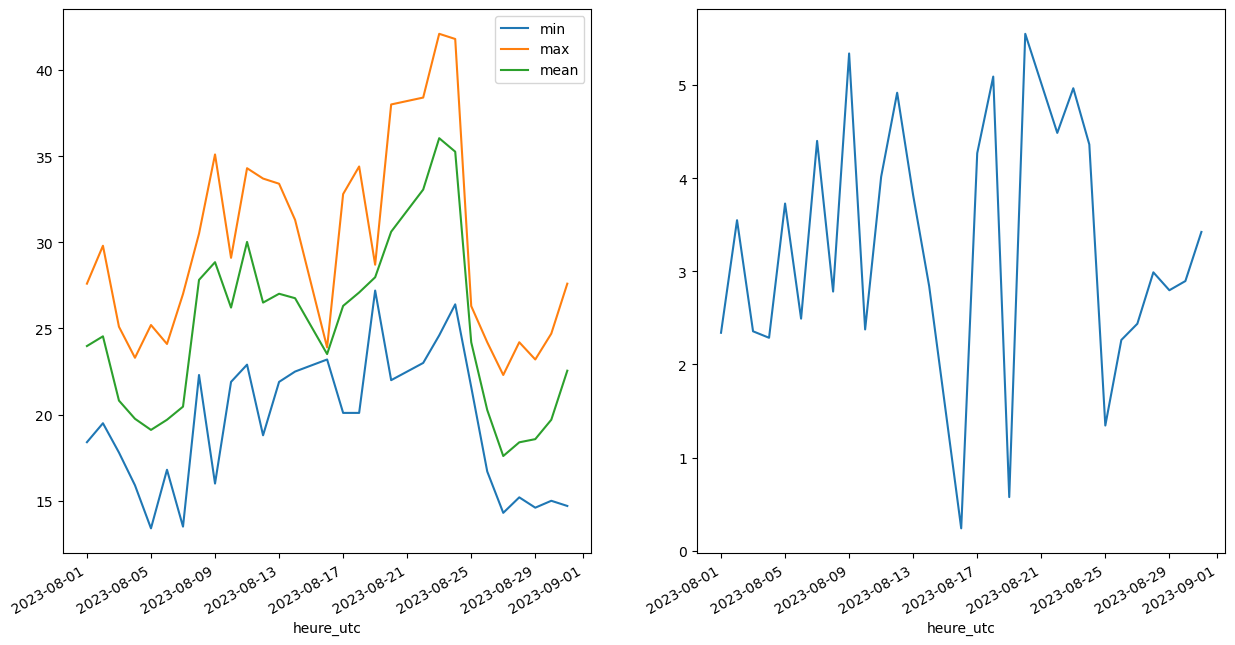

In [219]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(15,8)
data1.droplevel(0, axis=1).plot(ax=ax1)
data2.plot(ax=ax2)

In [216]:
fig.set_size_inches?

Signature: fig.set_size_inches(w, h=None, forward=True)
Docstring:
Set the figure size in inches.

Call signatures::

     fig.set_size_inches(w, h)  # OR
     fig.set_size_inches((w, h))

Parameters
----------
w : (float, float) or float
    Width and height in inches (if height not specified as a separate
    argument) or width.
h : float
    Height in inches.
forward : bool, default: True
    If ``True``, the canvas size is automatically updated, e.g.,
    you can resize the figure window from the shell.

See Also
--------
matplotlib.figure.Figure.get_size_inches
matplotlib.figure.Figure.set_figwidth
matplotlib.figure.Figure.set_figheight

Notes
-----
To transform from pixels to inches divide by `Figure.dpi`.
File:      c:\users\matthias\anaconda3\envs\env311\lib\site-packages\matplotlib\figure.py
Type:      method

In [ ]:
# aout 2023: plot min,max, mean by day